Waiter's tips prediction and analysis

In [1]:
#dataset is a case study from Kaggle

#Lets start by importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
#Importing the csv file and checking the data type/information of the dataset
df=pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


In [3]:
df.shape

(244, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    object 
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   size              244 non-null    int64  
 7   price_per_person  244 non-null    float64
 8   Payer Name        244 non-null    object 
 9   CC Number         244 non-null    int64  
 10  Payment ID        244 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 21.1+ KB


There are many unnessary columns in here so let's drop them

In [7]:
df.drop(columns=['price_per_person','Payer Name','CC Number','Payment ID'],inplace=True)
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [8]:
#checking for any null values, there seems to be none so let's continue with further analysis
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Visualization analysis

checking the distribution of day and time for who pays the total bill/tips between male/female and smoker/non-smoker

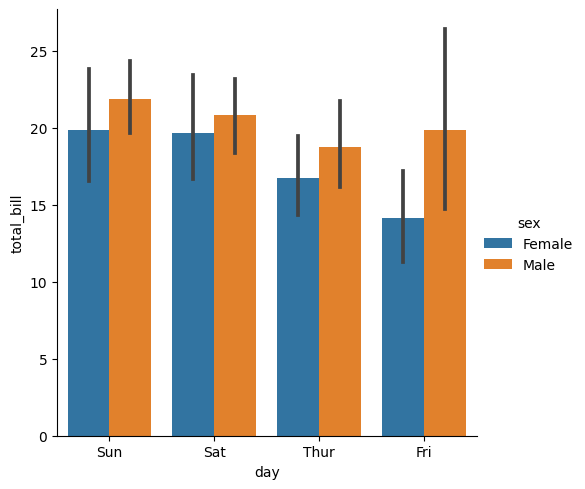

In [10]:
sns.catplot(data=df, kind="bar", x="day", y="total_bill", hue="sex")

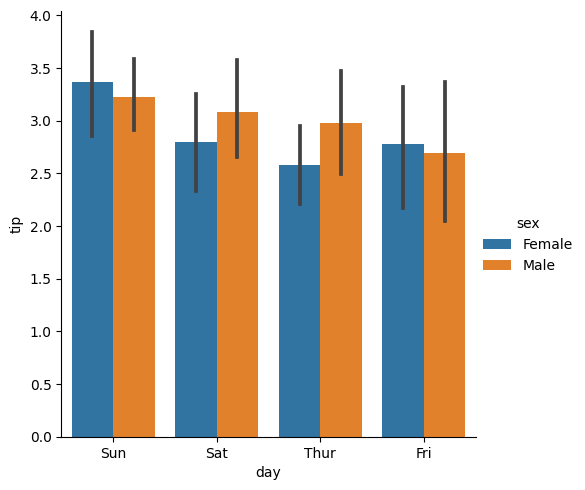

In [11]:
sns.catplot(data=df, kind="bar", x="day", y="tip", hue="sex")

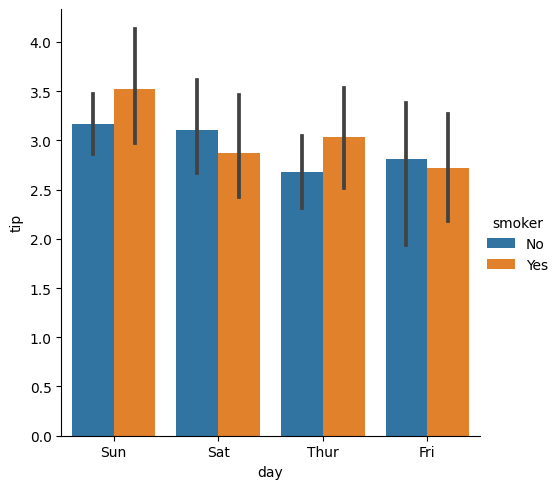

In [15]:
sns.catplot(data=df, kind="bar", x="day", y="tip", hue="smoker")

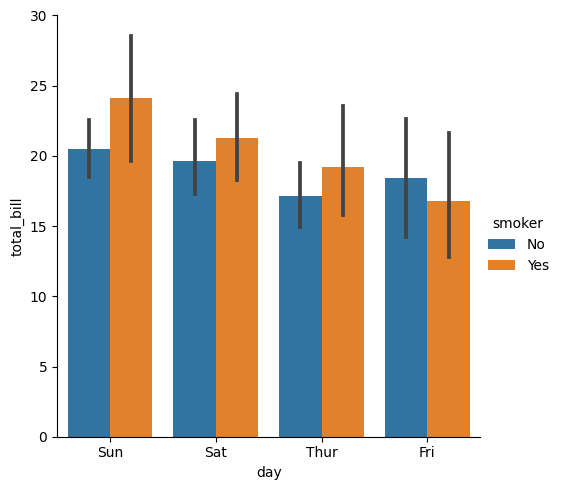

In [16]:
sns.catplot(data=df, kind="bar", x="day", y="total_bill", hue="smoker")

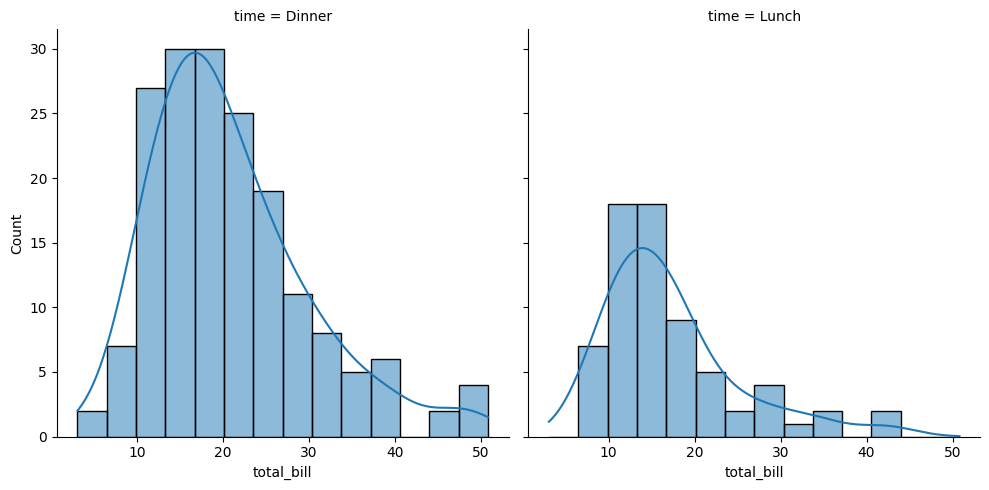

In [17]:
sns.displot(data=df, x="total_bill", col="time", kde=True)

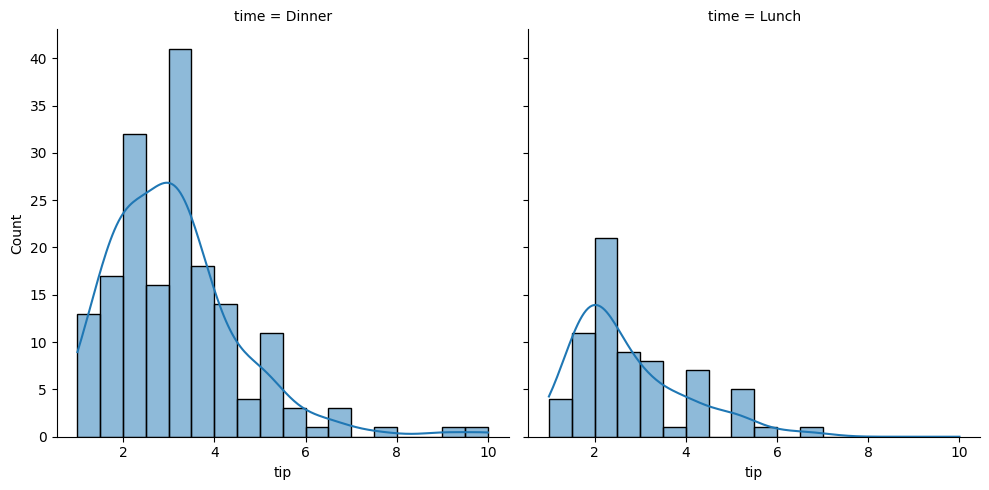

In [19]:
sns.displot(data=df, x="tip", col="time", kde=True)

from the above diagrams, males tend to tip more and better time to tip is during dinner

<AxesSubplot:xlabel='tip_percentage', ylabel='Count'>

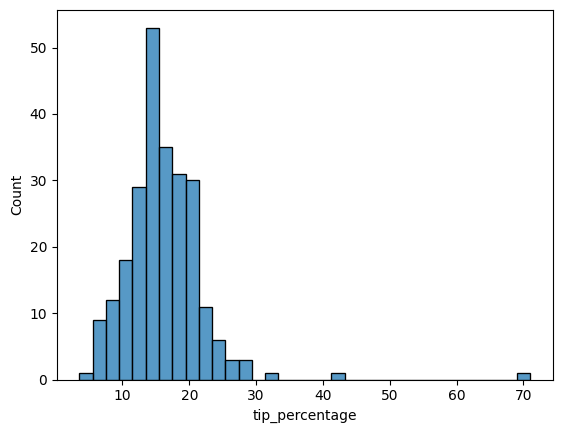

In [28]:
#let's see the tip percentages
df['tip_percentage'] = df['tip']/df['total_bill']*100
sns.histplot(df['tip_percentage'])

The tip percentage highest is between 10-20% of the total bill

<AxesSubplot:>

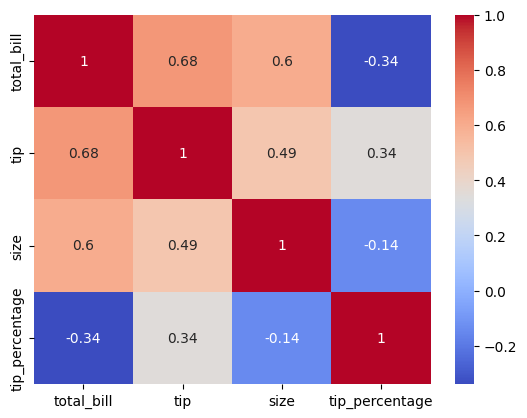

In [32]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [40]:
#modelling the dataset
features = df.drop('tip', axis=1)
target = df['tip']
  
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.2, random_state=22)
X_train.shape, X_val.shape

<IPython.core.display.Javascript object>

((195, 7), (49, 7))

In [43]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error as mae

In [36]:
le = LabelEncoder()
  
for col in df.columns:
  if df[col].dtype == object:
    df[col] = le.fit_transform(df[col])
  
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,0,0,2,0,2,5.944673
1,10.34,1.66,1,0,2,0,3,16.054159
2,21.01,3.50,1,0,2,0,3,16.658734
3,23.68,3.31,1,0,2,0,2,13.978041
4,24.59,3.61,0,0,2,0,4,14.680765


In [44]:
models = [LinearRegression(), XGBRegressor(), RandomForestRegressor(), AdaBoostRegressor()]
  
for i in range(4):
  models[i].fit(X_train, Y_train)
  
  print(f'{models[i]} : ')
  pred_train = models[i].predict(X_train)
  print('Training Accuracy : ', mae(Y_train, pred_train))
  
  pred_val = models[i].predict(X_val)
  print('Validation Accuracy : ', mae(Y_val, pred_val))
  print()

LinearRegression() : 
Training Accuracy :  0.3328028833873628
Validation Accuracy :  0.40431318657835513

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) : 
Training Accuracy :  0.0013539733275389158
Validation Accuracy :  0.18893821648188996

RandomForestRegressor() : 
Training Accuracy :  0.08560102564102584
Validation Accuracy :  0.19144897959183746

Ada